# Installation and Requirements


In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.primitives import Sampler, StatevectorSampler, Estimator

# Problem 1: Basic Quantum Gates

## Part 1.a

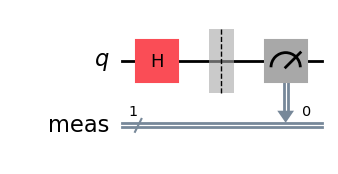

In [28]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

qc.draw("mpl")

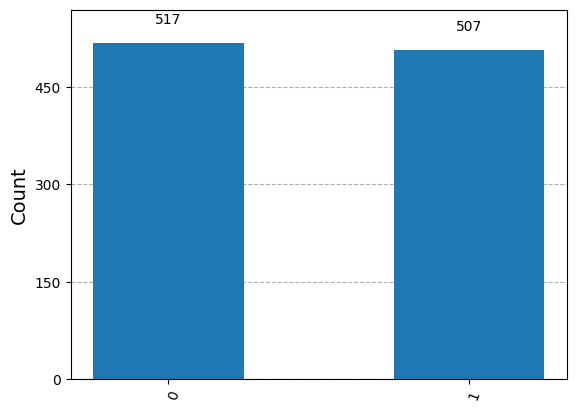

In [29]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

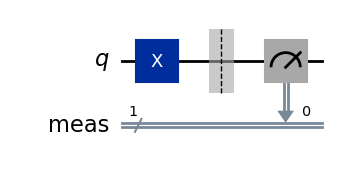

In [26]:
qc = QuantumCircuit(1)
qc.x(0)
qc.measure_all()

qc.draw("mpl")

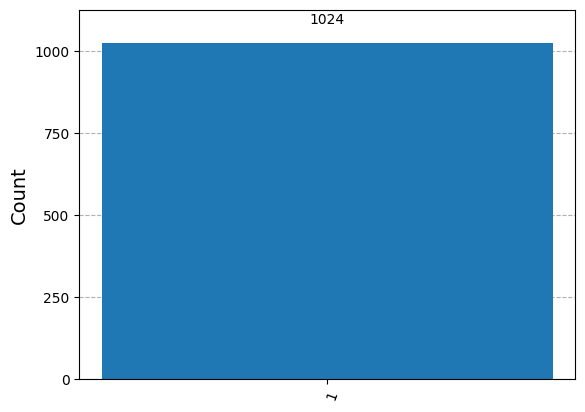

In [27]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

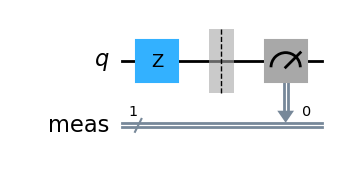

In [24]:
qc = QuantumCircuit(1)
qc.z(0)
qc.measure_all()

qc.draw("mpl")

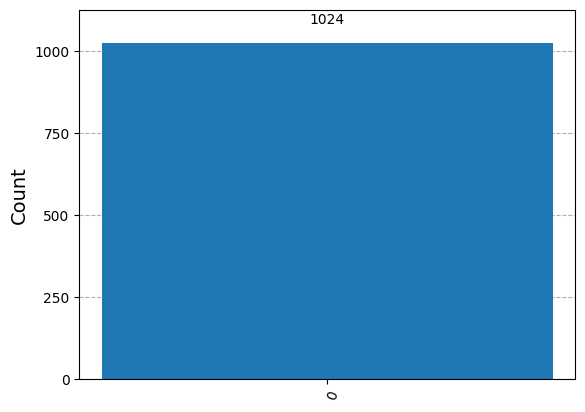

In [25]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

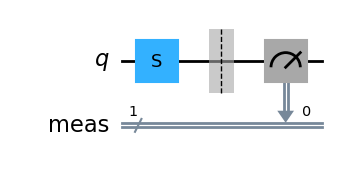

In [22]:
qc = QuantumCircuit(1)
qc.s(0)
qc.measure_all()

qc.draw("mpl")

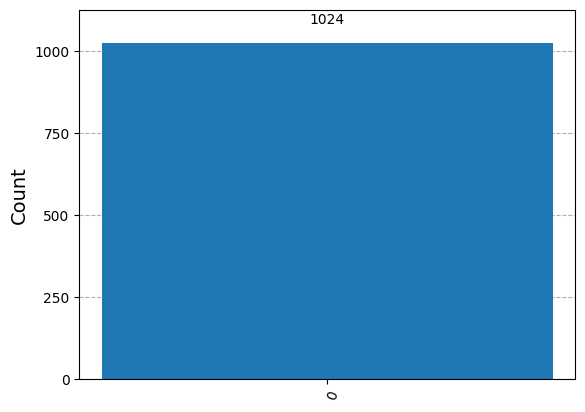

In [23]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

## Part 1.b

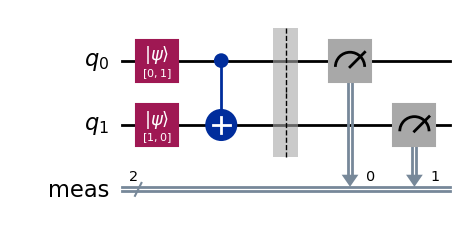

In [20]:
qc = QuantumCircuit(2)
qc.initialize([0,1], 0)
qc.initialize([1,0], 1)
qc.cx(0,1)
qc.measure_all()

qc.draw("mpl")

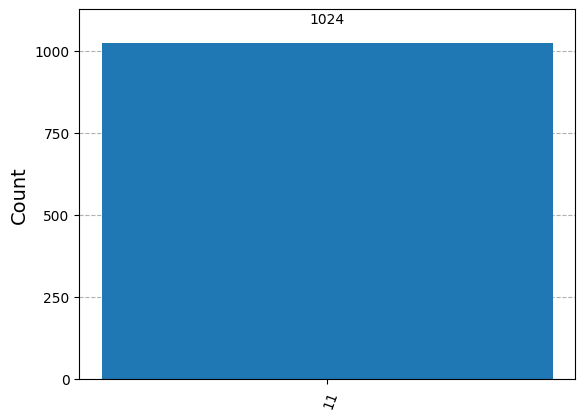

In [21]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

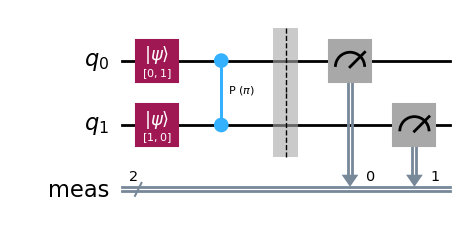

In [16]:
qc = QuantumCircuit(2)
qc.initialize([0,1], 0)
qc.initialize([1,0], 1)
qc.cp(pi, 0,1) # act like Z gate :)
qc.measure_all()

qc.draw("mpl")

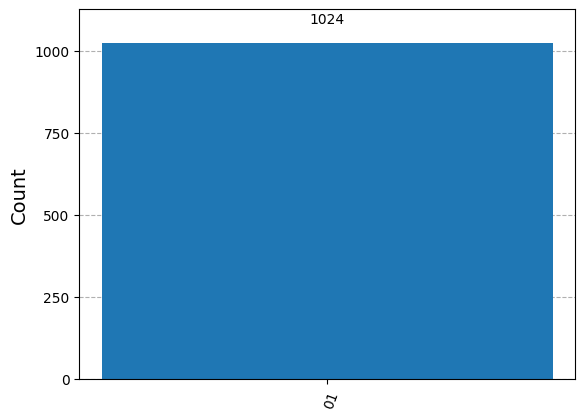

In [17]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

# Problem 2: Quantum Teleportation

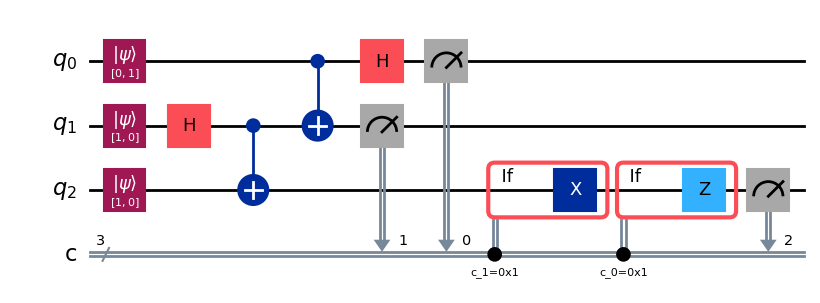

In [34]:
qc = QuantumCircuit(3,3)
qc.initialize([0,1], 0)
qc.initialize([1,0], 1)
qc.initialize([1,0], 2)
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)
with qc.if_test((1, 1)) as else_:
    qc.x(2)
# qc.x(2).c_if(1, 1) # deprecated
with qc.if_test((0, 1)) as else_:
    qc.z(2)
# qc.z(2).c_if(0, 1) # deprecated
qc.measure(2, 2)

qc.draw("mpl")

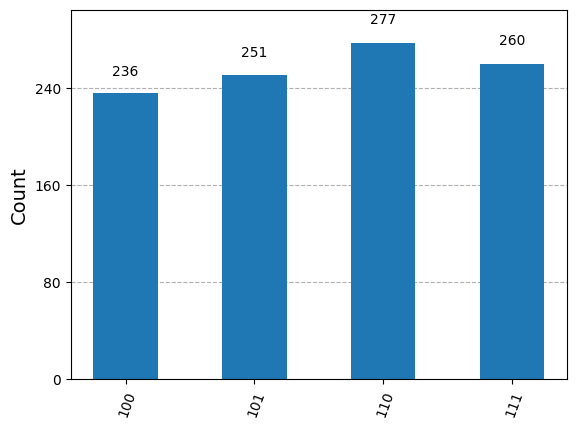

In [35]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)
# our sequence is q_2 q_1 q_2, and our aim to examine q_2 that is equal to 1 :)

# Problem 3: Simon's Algorithm

Simon's algorithm for 2 qubits with the secret string $b=11$, so that $f(x) = f(y)$ if $y = x \oplus s$. The quantum circuit to solve the problem is:

<ol>
    <li> Two $2$-qubit input registers are initialized to the zero state:
    

$$\lvert \psi_1 \rangle = \lvert 0 0 \rangle_1 \lvert 0 0 \rangle_2 $$

 </li>
    
   <li> Apply Hadamard gates to the qubits in the first register:
    

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \lvert 0 0 \rangle_2 $$

 </li>
    
   <li> For the string $s=11$, the query function can be implemented as $\text{Q}_f = CX_{1_a 2_a}CX_{1_a 2_b}CX_{1_b 2_a}CX_{1_b 2_b}$:   

$$
\begin{aligned}
\lvert \psi_3 \rangle = \frac{1}{2} ( \quad
& \lvert 0 0 \rangle_1  \lvert 0 0 \rangle_2 & \\[6pt]
+ & \lvert 0 1 \rangle_1 \lvert 1  1 \rangle_2 & \\[6pt]
+ & \lvert 1 0 \rangle_1 \lvert  1   1  \rangle_2 & \\[6pt]
+ & \lvert 1 1 \rangle_1 \lvert 0 0 \rangle_2 & \; )\\
\end{aligned}
$$    
   </li>
    
   <li> We measure the second register. With $50\%$ probability we will see either $\lvert  0   0  \rangle_2$ or $\lvert  1   1  \rangle_2$. For the sake of the example, let us assume that we see $\lvert  1   1  \rangle_2$. The state of the system is then
    

$$ \lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert  0   1  \rangle_1 + \lvert  1   0  \rangle_1 \right)  $$


    
   where we omitted the second register since it has been measured.
    
   </li>
    
    
    
   <li> Apply Hadamard on the first register
    $$ \lvert \psi_5 \rangle = \frac{1}{2\sqrt{2}} \left[ \left( \lvert 0 \rangle + \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) + \left( \lvert 0 \rangle - \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle + \lvert 1 \rangle \right)  \right] \\
    =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle - \lvert 0 1 \rangle + \lvert 1 0 \rangle - \lvert 1 1 \rangle   + \lvert 0 0 \rangle + \lvert 0 1 \rangle - \lvert 1 0 \rangle - \lvert 1 1 \rangle \right] \\
    = \frac{1}{\sqrt{2}} \left( \lvert 0 0 \rangle - \lvert 1 1 \rangle \right)$$
    
   </li>
    
   <li> Measuring the first register will give either $\lvert 0 0 \rangle$ or $\lvert 1 1 \rangle$ with equal probability.
    </li>
    <li>
    If we see $\lvert 1 1 \rangle$, then:   
    

$$ s \cdot 11 = 0 $$

If we repeat steps 1-6 many times, we would only measure $|00\rangle$ or $|11\rangle$ as

$$ s \cdot 11 = 0 $$
$$ s \cdot 00 = 0 $$
        
are the only equations that satisfy $s=11$. We can verify $s=11$ by picking a random input ($x_i$) and checking $f(x_i) = f(x_i \oplus s)$.

   </li>
</ol>

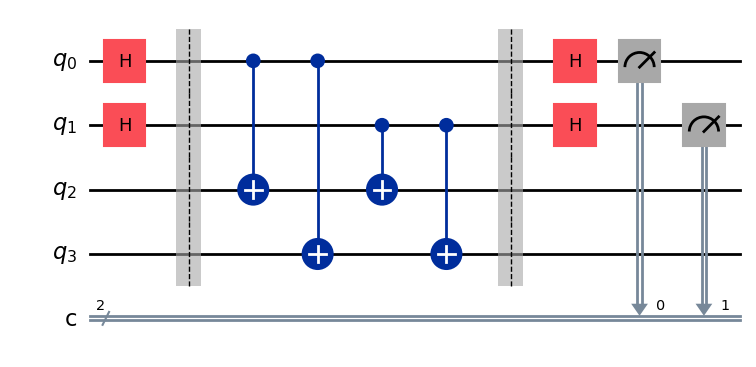

In [ ]:
# s = 11
qc = QuantumCircuit(4, 2)
qc.h(range(2))

qc.barrier()

# implement oracle
for i in range(2):
  qc.cx(i, 2)
  qc.cx(i, 3)

qc.barrier()

qc.h(range(2))

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw("mpl")

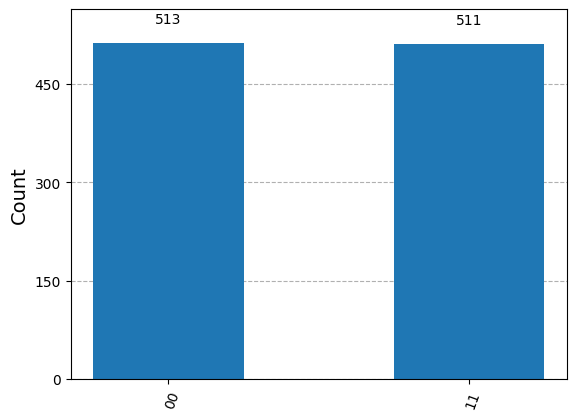

In [ ]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

# Problem 4: Grover’s Algorithm

Oracle for $\lvert \omega \rangle = \lvert 11 \rangle$
Let's look at the case $\lvert w \rangle = \lvert 11 \rangle$. The oracle $U_\omega=I-2| \omega \rangle\langle \omega |$ in this case acts as follows:

$$U_\omega | s \rangle = U_\omega \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right) = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle - |11\rangle \right).$$

or:

$$
U_\omega =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$


Reflection $U_s$
In order to complete the circuit we need to implement the additional reflection $U_s = 2|s\rangle\langle s| - I$. Since this is a reflection about $|s\rangle$, we want to add a negative phase to every state orthogonal to $|s\rangle$.

One way we can do this is to use the operation that transforms the state $|s\rangle \rightarrow |0\rangle$, which we already know is the Hadamard gate applied to each qubit:

$$H^{\otimes n}|s\rangle = |0\rangle$$

Then we apply a circuit that adds a negative phase to the states orthogonal to $|0\rangle$:

$$U_0 \frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( \lvert 00 \rangle - \lvert 01 \rangle - \lvert 10 \rangle - \lvert 11 \rangle \right)$$


Finally, we do the operation that transforms the state $|0\rangle \rightarrow |s\rangle$ (the H-gate again):

$$H^{\otimes n}U_0 H^{\otimes n} = U_s$$

that actually $U_0 = CZ.Z^{\otimes2}$.

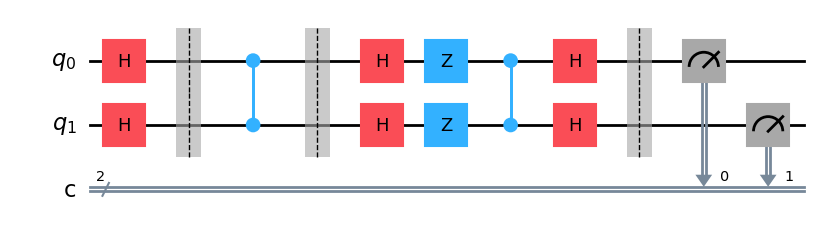

In [36]:
# w = 11
qc = QuantumCircuit(2, 2)
qc.h(range(2))

qc.barrier()
qc.cz(0,1)
qc.barrier()

qc.h([0,1])
qc.z([0,1])
qc.cz(0,1)
qc.h([0,1])

qc.barrier()

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw("mpl")

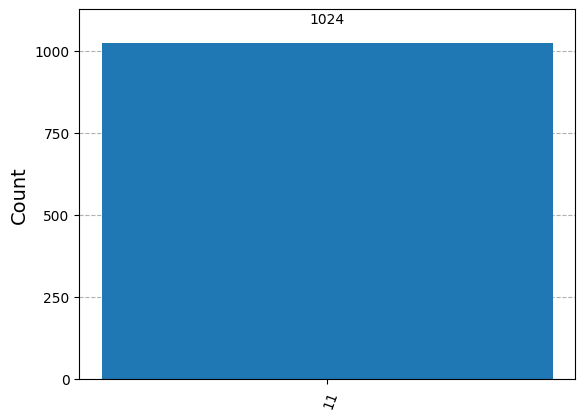

In [37]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

# References



*   https://docs.quantum.ibm.com/api/qiskit

